<h1> ELABORATO QUANTUM INFORMATION </h1>

<h5>D'amora Agostino M6300...</h5>
<h5>Esposito Marcello M63001768</h5>

__________________________________________________________________________________________________________________________________

<h3>Libs</h3>

In [1]:
%pip install qiskit-aer==0.16.1
%pip install qiskit==1.3.2
%pip install qiskit-ibm-runtime==0.26.0
%pip install qiskit_experiments==0.7.0
%pip install matplotlib==3.8.4
%pip install pylatexenc==2.10
%pip install seaborn==0.13.2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit_experiments.library import ProcessTomography
from qiskit.visualization import plot_bloch_multivector, plot_state_city, array_to_latex
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator, StabilizerState, purity

<h3>Basic Examples</h3>

<h5> Init circuit </h5>

In [3]:
qc_1 = QuantumCircuit(1)
qc_1.x(0) # Create |1> state

qc_plus = QuantumCircuit(1)
qc_plus.h(0) # Create |+> state

<h5> Ket rapresentation </h5>

In [4]:
state_vector = Statevector(qc_1)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [5]:
state_vector = Statevector(qc_plus)
state_vector.draw('latex')

<IPython.core.display.Latex object>

<h5> Density matrix rapresentation </h5>

In [6]:
print("Density Matrix Representation:")

density_matrix = DensityMatrix(qc_1)
density_matrix.draw('latex')

Density Matrix Representation:


<IPython.core.display.Latex object>

In [7]:
density_matrix = DensityMatrix(qc_plus)
density_matrix.draw('latex')

<IPython.core.display.Latex object>

<h5> Stabilizer rapresentation </h5>

In [8]:
stabilizer_state = StabilizerState(qc_1)
print(stabilizer_state)
stabilizer_state = StabilizerState(qc_plus)
print(stabilizer_state)

StabilizerState(['-Z'])
StabilizerState(['+X'])


<h2> State space growht </h2>

In [9]:
# init circutis

qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0,1)

qc_ghz = QuantumCircuit(3)
qc_ghz.h(0)
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)

<h5> Density Matrix </h5> 2^n x 2^n matrix

In [10]:
density_matrix = DensityMatrix(qc_phi_plus)
print(density_matrix.dim)
density_matrix.draw('latex')

4


<IPython.core.display.Latex object>

In [11]:
density_matrix = DensityMatrix(qc_ghz)
print(density_matrix.dim)
density_matrix.draw('latex')

8


<IPython.core.display.Latex object>

<h5> Stabilizer </h5>
n generators

In [12]:
stabilizer_state = StabilizerState(qc_phi_plus)
print(stabilizer_state)

StabilizerState(['+XX', '+ZZ'])


In [13]:
stabilizer_state = StabilizerState(qc_ghz)
print(stabilizer_state)

StabilizerState(['+XXX', '+IZZ', '+ZIZ'])


<h2>Mixed State</h2> purity always != 1

In [14]:
# Directly setup mixed state

mixed_state = (
    1/2 * DensityMatrix(qc_1)
    +
    1/2 * DensityMatrix(qc_plus)
)

print(f"Purity {purity(mixed_state)}")
mixed_state.draw('latex')



Purity (0.75+0j)


<IPython.core.display.Latex object>

In [15]:
# Get mixed state as partial trace of entangled system
qc_mixed = QuantumCircuit(2)
qc_mixed.h(0)
qc_mixed.cx(0, 1)

mixed_state = partial_trace(Statevector.from_instruction(qc_mixed), [0])
print(f"Purity {purity(mixed_state)}")
mixed_state.draw('latex')

Purity (0.4999999999999998+0j)


<IPython.core.display.Latex object>

Non Clifford Circuit

In [28]:
# Circuito quantistico con porta non di Clifford
qc_non_clifford = QuantumCircuit(2)
qc_non_clifford.h(0)
qc_non_clifford.tdg(0)
qc_non_clifford.cx(0, 1)

In [ ]:
DensityMatrix(qc_non_clifford).draw('latex')

In [31]:
try:
    StabilizerState(qc_non_clifford)
except Exception as e:
    print(f"Error using stabilizer formalism: {e}")

Error using stabilizer formalism: 'Cannot update Clifford with non-Clifford gate tdg'


---

<h2>Benchmarks</h2>

In [16]:
# benchmarks imports
import time as bm_t
import tracemalloc as bm_m

<h4>Clifford circuits benchmark</h4> only H - S - CNOT

<h5>Testbench circuit & configuration</h5>

In [17]:
shots = 20000 # number of simulations

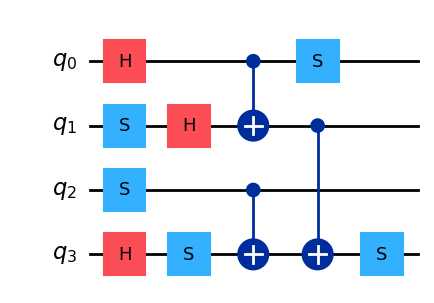

In [18]:
qc = QuantumCircuit(4)

# Layer 1
qc.h(0)
qc.s(1)
qc.s(2)
qc.h(3)

# Layer 2
qc.h(1)
qc.s(3)

# Layer 3
qc.cx(0, 1)
qc.cx(2, 3)

# Layer 4
qc.cx(1, 3)
qc.s(0)

# Layer 5
qc.s(3)

qc.draw('mpl')

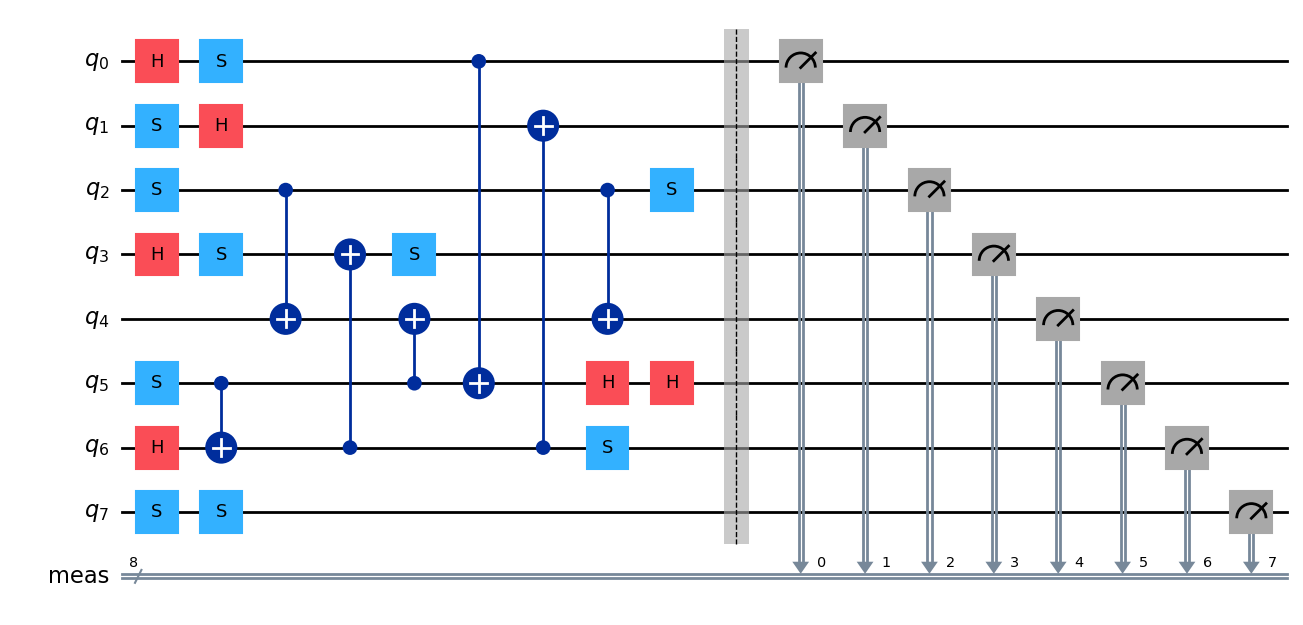

In [19]:
qc_2 = QuantumCircuit(8)

# Layer 1
qc_2.h(0)
qc_2.s(1)
qc_2.s(2)
qc_2.h(3)
qc_2.s(5)
qc_2.h(6)

# Layer 2
qc_2.h(1)
qc_2.s(3)
qc_2.cx(2, 4)
qc_2.cx(5, 6)

# Layer 3
qc_2.cx(6, 3)
qc_2.cx(5, 4)
qc_2.s(0)

# Layer 4
qc_2.cx(0, 5)
qc_2.s(7)

# Layer 5
qc_2.s(3)
qc_2.s(7)
qc_2.h(5)

qc_2.cx(6, 1)
qc_2.cx(2, 4)
qc_2.h(5)
qc_2.s(2)
qc_2.s(6)

qc_2.measure_all()

qc_2.draw('mpl')

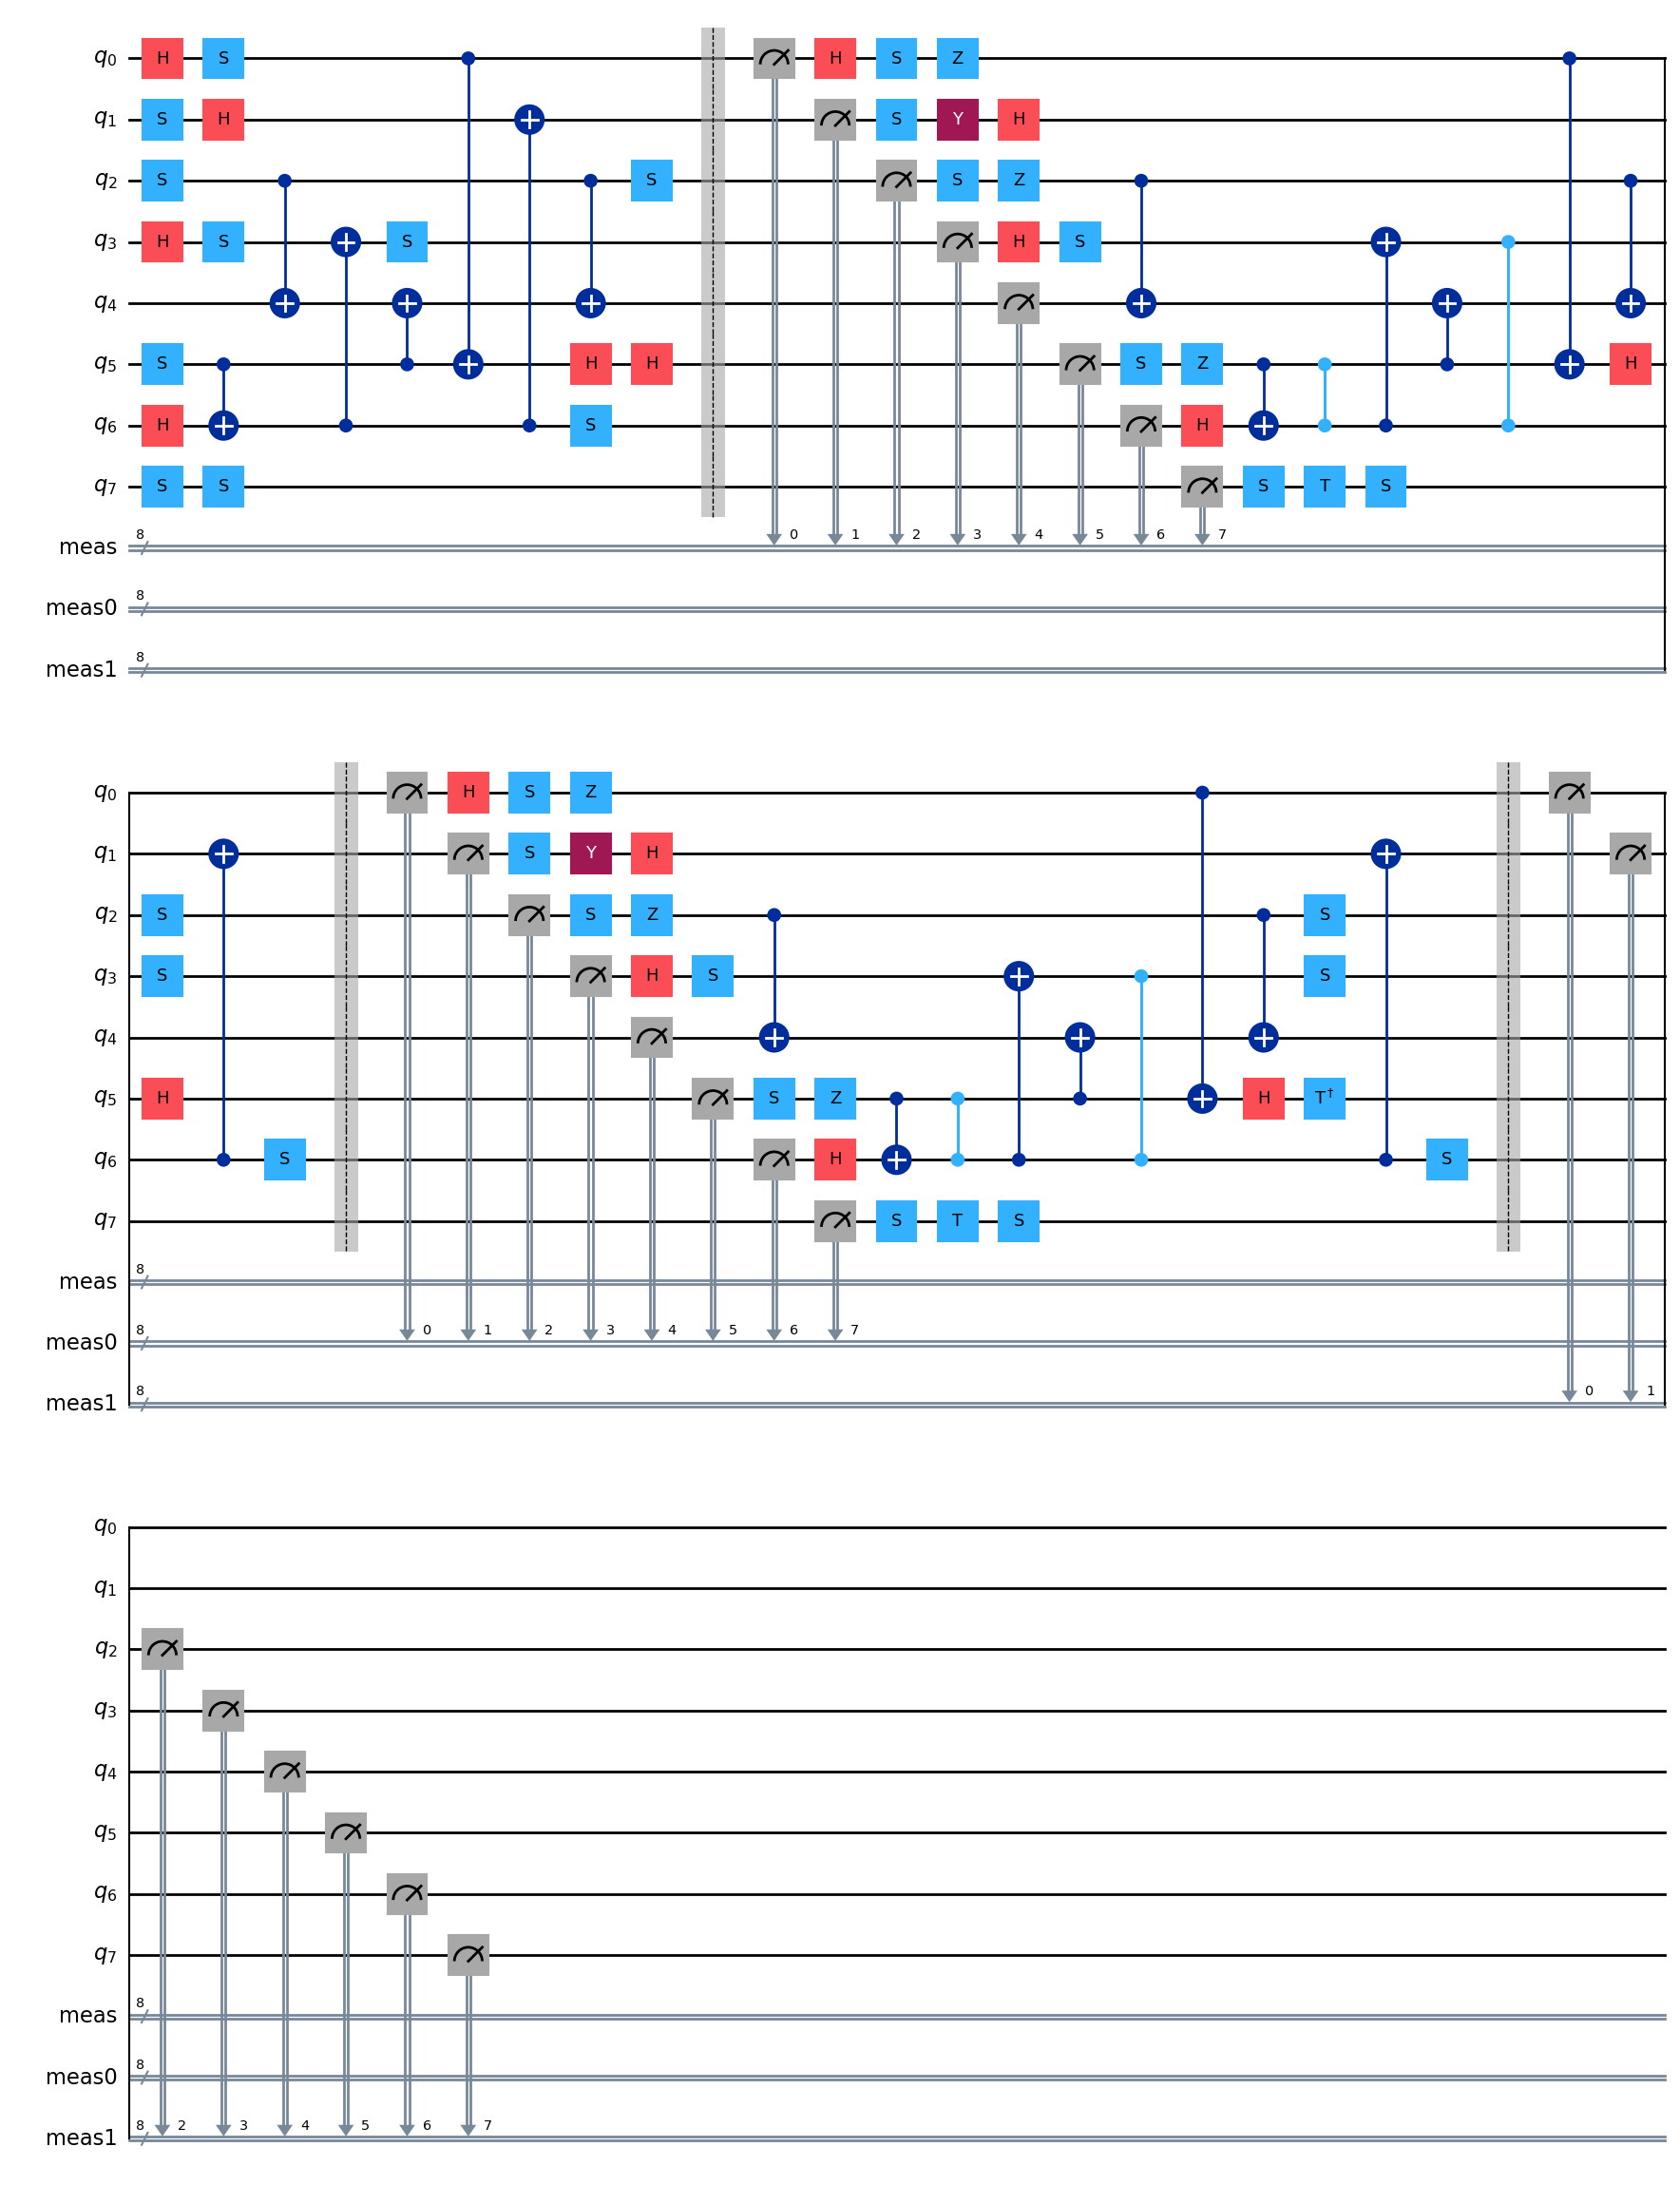

In [32]:
qc_4 = QuantumCircuit(8)

# Layer 1
qc_2.h(0)
qc_2.s(1)
qc_2.y(1)
qc_2.s(2)
qc_2.z(2)
qc_2.h(3)
qc_2.s(5)
qc_2.z(5)
qc_2.h(6)

# Layer 2
qc_2.h(1)
qc_2.s(3)
qc_2.cx(2, 4)
qc_2.cx(5, 6)
qc_2.cz(5, 6)

# Layer 3
qc_2.cx(6, 3)
qc_2.cz(6, 3)
qc_2.cx(5, 4)
qc_2.s(0)
qc_2.z(0)

# Layer 4
qc_2.cx(0, 5)
qc_2.s(7)
qc_2.t(7)

# Layer 5
qc_2.s(3)
qc_2.s(7)
qc_2.h(5)

qc_2.cx(6, 1)
qc_2.cx(2, 4)
qc_2.tdg(5)
qc_2.s(2)
qc_2.s(6)

qc_2.measure_all()

qc_2.draw('mpl')

In [21]:
import random


def random_clifford_circuit(n, depth):
    qc = QuantumCircuit(n)
    for _ in range(depth):
        for q in range(n):
            if random.choice([True, False]):
                qc.h(q)
            else:
                qc.s(q)
        # Add some entangling gates
        for i in range(n - 1):
            qc.cx(i, i + 1)
    return qc

qc_3 = random_clifford_circuit(1000, 2230)
# qc_3.draw('mpl')

In [ ]:
# qc_to_benchmark = qc_1
# qc_to_benchmark = qc_2
qc_to_benchmark = qc_3
# qc_to_benchmark = qc_4

#TODO: La simulazione automaticamente sceglie sempre l'approccio migliore

<h5>Density benchmark</h5>

In [44]:
simulator_density = AerSimulator(method="density_matrix") 
# # Start measuring memory usage
# bm_m.start()
# start_time = bm_t.time()
print(simulator_density.available_methods())
# Run the circuit simulation
result = simulator_density.run(qc_to_benchmark, shots=shots, method="density_matrix").result()

# elapsed_time = bm_t.time() - start_time
# current, peak = bm_m.get_traced_memory()
# bm_m.stop()

# print(elapsed_time, peak / 1024)  # peak in KB



('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')


<h5>Stabilizer benchmark</h5>

In [ ]:
simulator_stabilizer = AerSimulator(method="stabilizer") 

# Start measuring memory usage
# bm_m.start()
# start_time = bm_t.time()

# Run the circuit simulation
result = simulator_stabilizer.run(qc_to_benchmark, shots=shots, method="stabilizer").result()

# elapsed_time = bm_t.time() - start_time
# current, peak = bm_m.get_traced_memory()
# bm_m.stop()

# print(elapsed_time, peak / 1024)  # peak in KB

---

<h2>Process Tomography</h2>

<h5>Density matrix</h5>

In [48]:
simulator_density = AerSimulator(method="density_matrix") 

circuit_tomo = ProcessTomography(qc_2, simulator_density)


<h5>Stabilizer</h5>

---

<h2>Quantum Error Correction</h2>